In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter



#Load data
raw_x, raw_y = np.loadtxt("ex1data1.txt", delimiter=',', usecols=(0,1), unpack=True)

In [2]:
#number of training examples
m = raw_x.size
print(m)

97


Text(0.5, 1.0, 'My first plot')

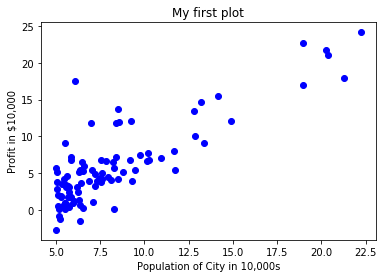

In [4]:
%matplotlib inline
plt.plot(raw_x,raw_y, 'bo')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.title("My first plot")

In [51]:
X = np.vstack( ( np.ones( (m), dtype=np.float64 ), raw_x ) ).T
theta = np.zeros(2)

In [52]:
def compute_cost(x, y, theta):
    m = y.size
    h = x @ theta
    error = np.square(h - y)
    return error.sum() * (1/(2*m))


print(compute_cost(X, raw_y, theta))

32.072733877455676


In [53]:
num_iter = 1500
alpha = 0.01
theta = np.zeros(2)
def gradient_descent(x, y, theta, alpha, iteration):
    m = y.size
    i = 0
    temp = np.zeros_like(theta)
    J_history = np.zeros(iteration)
    theta_history = np.zeros((iteration, 2))
    for i in range(iteration):
        h = x @ theta
        j = 0
        for j in range(2):
            temp[j] = (alpha/m)*(np.sum((h - y)*x[:,j]))
        theta -= temp
        print(theta)
        J_history[i] = compute_cost(x, y, theta)
        theta_history[i] = theta
        
    return theta, J_history, theta_history


theta, J_history, theta_history = gradient_descent(X, raw_y, theta, alpha, num_iter)

n = np.arange(num_iter)
#%matplotlib notebook
#plt.plot(n, J_history)

[0.05839135 0.6532885 ]
[0.06289175 0.77000978]
[0.05782293 0.79134812]
[0.05106363 0.79572981]
[0.04401438 0.79709618]
[0.03692413 0.79792547]
[0.02983712 0.79865824]
[0.02276118 0.79937279]
[0.0156977  0.80008305]
[0.0086469 0.8007915]
[0.00160879 0.80149857]
[-0.00541662  0.80220436]
[-0.01242938  0.80290886]
[-0.01942949  0.8036121 ]
[-0.02641699  0.80431407]
[-0.03339189  0.80501478]
[-0.04035421  0.80571422]
[-0.04730399  0.8064124 ]
[-0.05424124  0.80710932]
[-0.06116598  0.80780498]
[-0.06807824  0.8084994 ]
[-0.07497804  0.80919256]
[-0.08186541  0.80988447]
[-0.08874035  0.81057513]
[-0.09560291  0.81126455]
[-0.10245309  0.81195272]
[-0.10929093  0.81263966]
[-0.11611644  0.81332535]
[-0.12292965  0.81400981]
[-0.12973057  0.81469304]
[-0.13651924  0.81537504]
[-0.14329567  0.8160558 ]
[-0.15005988  0.81673534]
[-0.15681191  0.81741365]
[-0.16355176  0.81809075]
[-0.17027946  0.81876662]
[-0.17699503  0.81944127]
[-0.1836985  0.8201147]
[-0.19038988  0.82078693]
[-0.1970692 

<IPython.core.display.Javascript object>


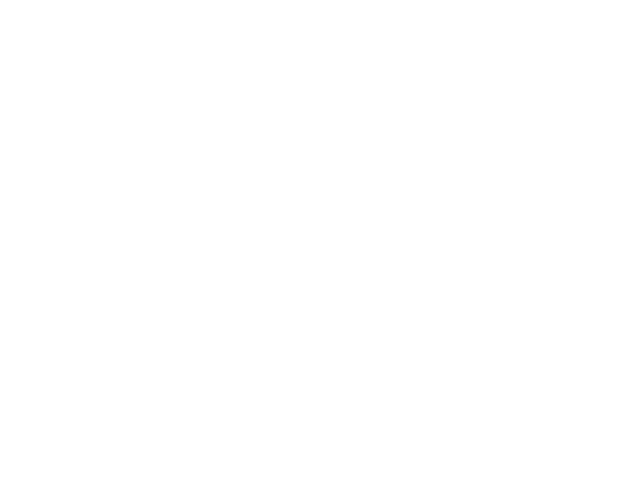

In [54]:
%matplotlib notebook
plt.plot(raw_x,raw_y, 'bo', label='Data')
plt.plot(X[:,1], X @ theta, 'r', label='Linear reggression')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.title("My first plot")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


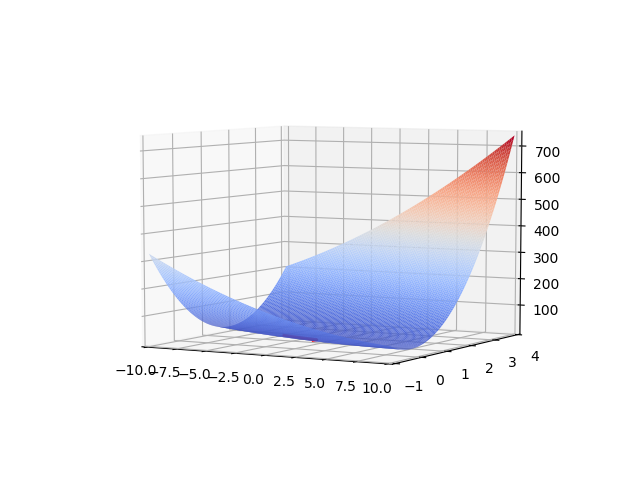

In [56]:
%matplotlib notebook

theta0_vals = np.linspace(-10, 10, num=100)
theta1_vals = np.linspace(-1, 4, num=100)
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

i = 0
j = 0
for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = compute_cost(X, raw_y, t)
    

t0, t1 = np.meshgrid(theta0_vals, theta1_vals)
#J_vals = J_vals.T
fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(t0, t1, J_vals.T, rstride=1, cstride=1, cmap=cm.coolwarm, edgecolor='none')
line = ax.plot(theta_history[:,0], theta_history[:,1], J_history, 'r', linewidth=2)


ax.set_xlim(-10,10)
ax.set_ylim(-1,4)
ax.view_init(30,-140)

plt.show()